In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Leemos los archivos del fichero

ciclistas = open ('/Users/34603/Desktop/TFG/Python/ciclistasVariablesSinNormalizarNiNombres.txt','r')
dataSet = list()
labels = list()

for linea in ciclistas: #Recorremos cada linea del archivo
    caracteristicas = linea.split()
    clase = 1 if caracteristicas[0] == "Profesional" else 0
    labels.append(clase)
    variables=[float(elemento) for elemento in caracteristicas[1:]]
    dataSet.append(variables)
dataSet=np.array(dataSet)
labels=np.array(labels)
num_variables = len(dataSet[0])

#Se normaizan las variables
mu=np.mean(dataSet,axis=0)
sigma=np.std(dataSet,axis=0)
dataSetNormalizado = ((dataSet-mu)/sigma)



In [7]:
#se crean los conjunto de entrenamiento y de testeo con "leave-one-out"
loo = LeaveOneOut()
loo.get_n_splits(dataSetNormalizado)


#Se crea el modelo de SVM con Kernel lineal
#CC=np.linspace(0.01,100.0,100)
CC=np.linspace(0.01,2.0,100)
modelos= list()
accuracy = list()
accuracyEntreno = list()
for i in CC:
    modelos.append(make_pipeline(StandardScaler(), SVC(C=i,kernel = 'linear')))

#Se entrenan y evaluan los modelos según el conjunto de test:
for modelo in modelos:
    precisionModelo= list()
    for train_index, test_index in loo.split(dataSet):
        prediccion=modelo.fit(dataSetNormalizado[train_index],labels[train_index]).predict(dataSetNormalizado[test_index])
        if prediccion != labels[test_index]:
            precisionModelo.append(0)
        else:
            precisionModelo.append(1)
    accuracy.append(sum(precisionModelo)/len(precisionModelo))
    
#Se entrenan y evaluan los modelos según el conjunto de entrenamiento:
for modelo in modelos:
    precisionModelo= list()
    for train_index, test_index in loo.split(dataSet):
        prediccion=modelo.fit(dataSetNormalizado[train_index],labels[train_index]).predict(dataSetNormalizado[train_index])
        k=0
        for pred in prediccion:
            k=+1
        if pred != labels[train_index[k]]:
            precisionModelo.append(0)
        else:
            precisionModelo.append(1)
    accuracyEntreno.append(sum(precisionModelo)/len(precisionModelo))





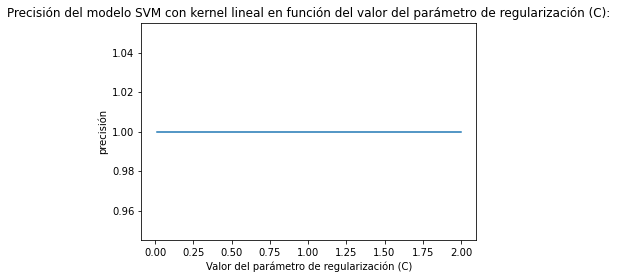

In [8]:
#Se crea la gráfica del test
figSVM = plt.figure()
ax1 = figSVM.add_subplot(111)
 # Establecer título
ax1.set_title('Precisión del modelo SVM con kernel lineal en función del valor del parámetro de regularización (C):')
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización (C)')
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
 # Dibujar diagrama de dispersión
ax1.plot(CC,accuracy)
plt.show()

In [4]:
modelos= list()
accuracy = list()

for i in range(num_variables):
    data = dataSetNormalizado[:,i:i+1]

    #se crean los conjunto de entrenamiento y de testeo con "leave-one-out"
    loo = LeaveOneOut()
    loo.get_n_splits(data)

    modelos = [make_pipeline(StandardScaler(), SVC(kernel = 'linear'))]
    for modelo in modelos:
        precisionModelo= list()
        for train_index, test_index in loo.split(dataSet):
            prediccion=modelo.fit(data[train_index],labels[train_index]).predict(data[test_index])
            if prediccion != labels[test_index]:
                precisionModelo.append(0)
            else:
                precisionModelo.append(1)
        accuracy.append(sum(precisionModelo)/len(precisionModelo))
#print(accuracy)

i=-1
for precision in accuracy:
    i=i+1
    if (precision>0.8):
        print('Precision de la variable: ' + str(precision))
        print('Posición de la variable: ' + str(i))

[0.2727272727272727, 0.3181818181818182, 0.5909090909090909, 0.8181818181818182, 0.8636363636363636, 0.9090909090909091, 1.0, 0.9090909090909091, 0.5, 0.7272727272727273, 0.3181818181818182, 0.5454545454545454, 0.7272727272727273, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.6818181818181818, 0.6363636363636364, 1.0, 0.5, 0.3181818181818182, 0.22727272727272727, 0.36363636363636365, 0.45454545454545453, 0.8636363636363636, 0.7727272727272727, 0.6818181818181818, 0.7272727272727273, 0.8181818181818182, 0.7727272727272727, 0.3181818181818182, 0.36363636363636365, 0.5, 0.6818181818181818, 0.7272727272727273, 0.6818181818181818, 0.45454545454545453, 0.4090909090909091, 0.2727272727272727, 0.9090909090909091, 0.9545454545454546, 0.8636363636363636, 0.7272727272727273, 0.6818181818181818, 0.4090909090909091, 0.6363636363636364, 0.6363636363636364, 0.4090909090909091, 0.7727272727272727, 0.6363636363636364, 0.5454545454545454, 0.3181818181818182, 0.5454545454545454, 0.4090909

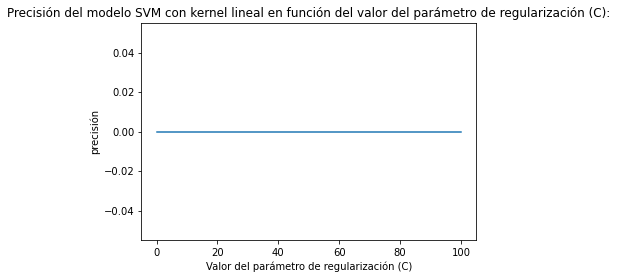

In [5]:
#Se crea la gráfica del train
figSVM = plt.figure()
ax1 = figSVM.add_subplot(111)
 # Establecer título
ax1.set_title('Precisión del modelo SVM con kernel lineal en función del valor del parámetro de regularización (C):')
 # Establecer etiquetas de eje X
plt.xlabel('Valor del parámetro de regularización (C)')
 # Establecer etiqueta del eje Y
plt.ylabel('precisión')
 # Dibujar diagrama de dispersión
ax1.plot(CC,accuracyEntreno)
plt.show()